In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt


In [ ]:
zip_path = '/content/datasetnolb.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'File berhasil diekstrak ke {extract_path}')

File berhasil diekstrak ke /content/


In [ ]:
def canny_edge_detection(image_array):
    gray_image = cv2.cvtColor(image_array.astype('float32'), cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(np.uint8(gray_image*255), threshold1=100, threshold2=200)
    return edges

In [ ]:
def show_images(original_img, segmented_img):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original_img)
    axes[0].set_title("Gambar asli")
    axes[0].axis("off")

    axes[1].imshow(segmented_img, cmap='gray')
    axes[1].set_title("Canny Edge Segmentation")
    axes[1].axis("off")

    plt.show()

In [ ]:
image_dir = '/content/datasetnolb'

images = []
labels = []


for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        edges = canny_edge_detection(img_array)
        edges = np.expand_dims(edges, axis=-1)
        label = int(filename.split('.')[0])
        images.append(edges)
        labels.append(label)

X = np.array(images)
y = np.array(labels)

In [ ]:
def select_image_by_path(image_path):
    if os.path.exists(image_path):
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        return img_array
    else:
        print(f"Gambar dengan path {image_path} tidak ditemukan!")
        return None

image_path = '/content/datasetnolb/350.jpg'
selected_image = select_image_by_path(image_path)

if selected_image is not None:
    segmented_image = canny_edge_detection(selected_image)
    show_images(selected_image, segmented_image)

Gambar dengan path /content/datasetnolb/350.jpg tidak ditemukan!


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model.fit(
    X, y,
    epochs=350,
    batch_size=32,
    callbacks=[checkpoint]
)

Epoch 1/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 504973.5000 - mae: 690.4422
Epoch 1: loss improved from inf to 504973.50000, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 504973.5000 - mae: 690.4422
Epoch 2/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 20601792.0000 - mae: 4284.1641
Epoch 2: loss did not improve from 504973.50000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 20601792.0000 - mae: 4284.1641
Epoch 3/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 61011.1758 - mae: 206.1518
Epoch 3: loss improved from 504973.50000 to 61011.17578, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 61011.1758 - mae: 206.1518
Epoch 4/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - loss: 801754.5625 - mae: 875.9830
Epoch 4: loss did not improve from 61011.17578
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step - loss: 801754.5625 - mae: 875.9830
Epoch 5/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 679728.5000 - mae: 806.3718
Epoch 5: loss d

File berhasil diekstrak ke /content/
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


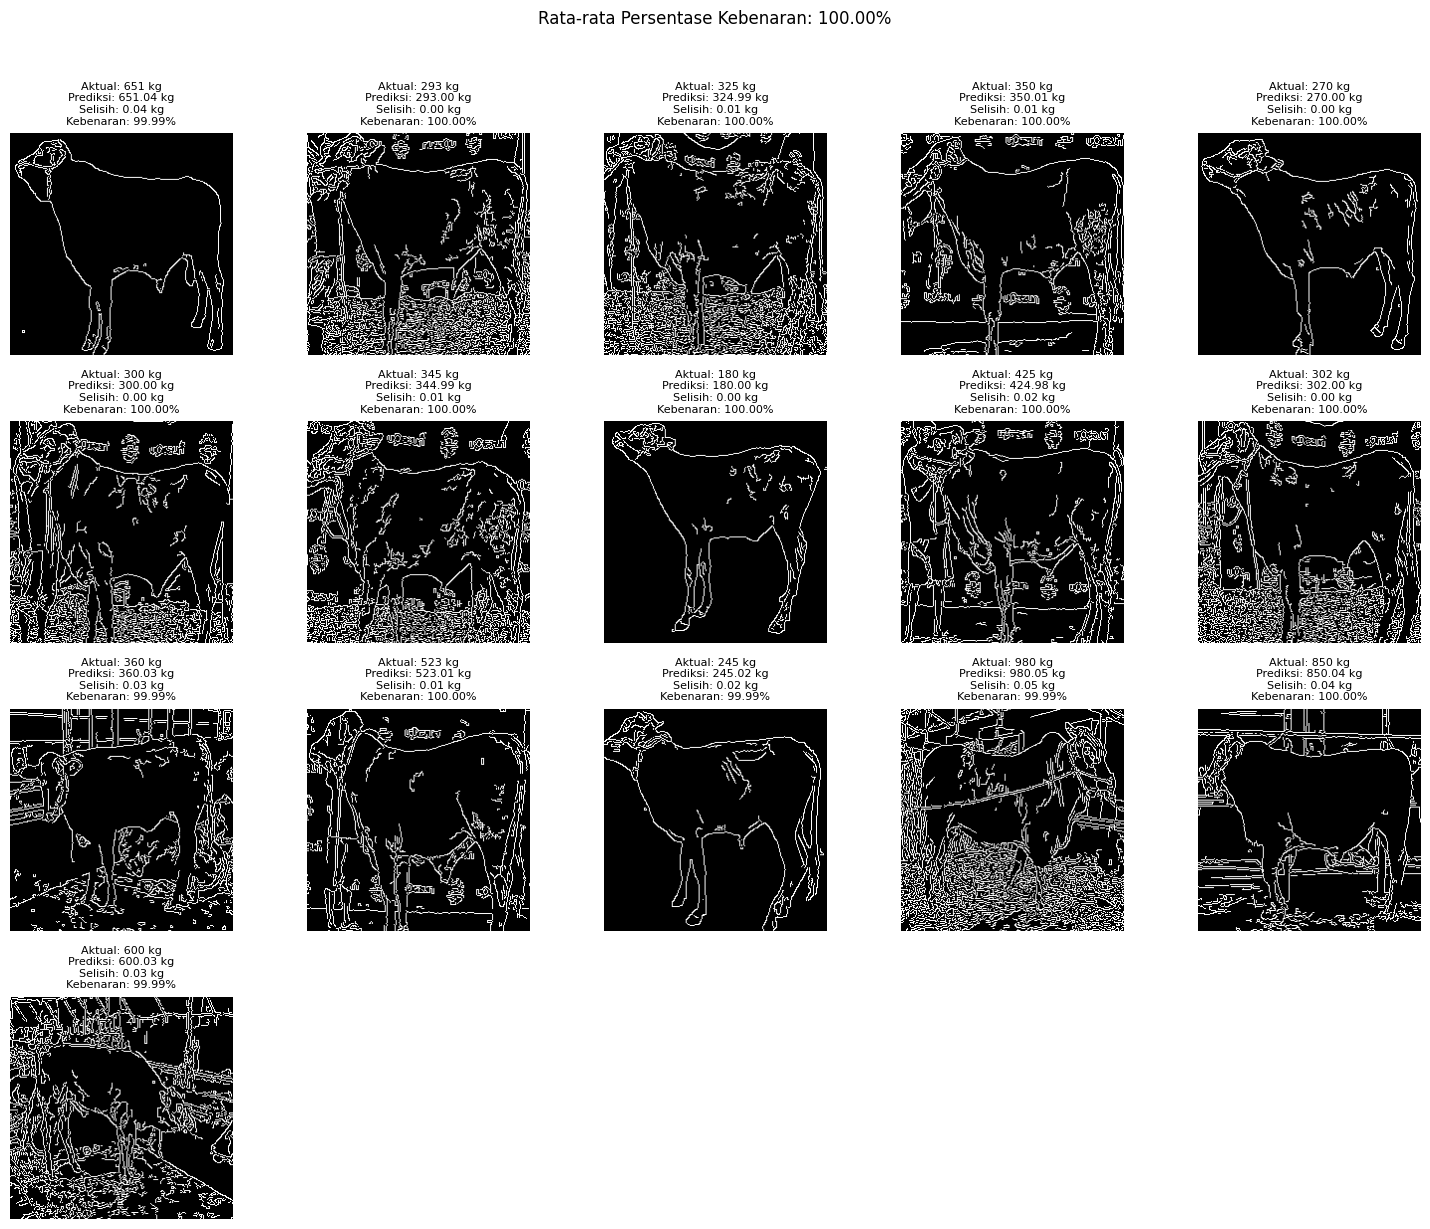

Rata-rata Persentase Kebenaran: 100.00%


In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt


test_zip_path = '/content/datasetnolb.zip'
test_extract_path = '/content/'
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

def canny_edge_detection(image_array):
    gray_image = cv2.cvtColor(image_array.astype('float32'), cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(np.uint8(gray_image * 255), threshold1=100, threshold2=200)
    return edges

image_dir = '/content/datasetnolb'

images = []
labels = []

# Memuat gambar dan label, serta menerapkan Canny Edge
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        # Hanya menggunakan Canny Edge
        edges = canny_edge_detection(img_array)
        edges = np.expand_dims(edges, axis=-1)
        label = int(filename.split('.')[0])
        images.append(edges)
        labels.append(label)

X = np.array(images)
y = np.array(labels)

best_model = tf.keras.models.load_model('best_model.keras')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)

num_images = len(X)
cols = 5
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i][:, :, 0], cmap='gray')
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8)

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

print(f'Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%')


File berhasil diekstrak ke /content/
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


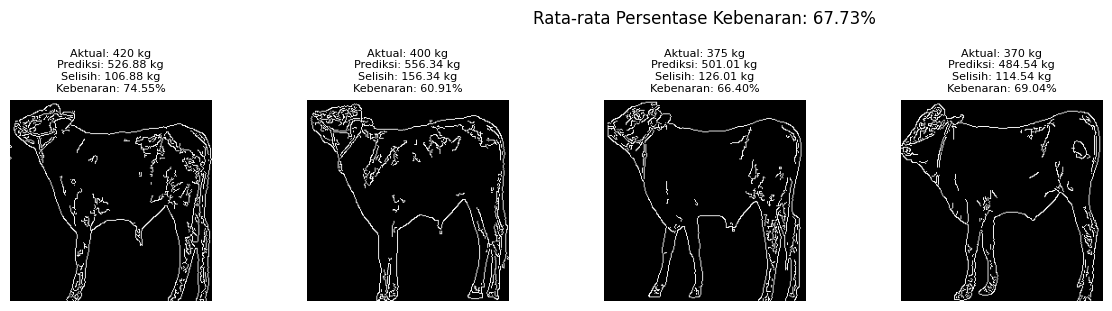

Rata-rata Persentase Kebenaran: 67.73%


In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt

test_zip_path = '/content/test.zip'
test_extract_path = '/content/'

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_path)

print(f'File berhasil diekstrak ke {test_extract_path}')

# Fungsi untuk Canny Edge Detection
def canny_edge_detection(image_array):
    gray_image = cv2.cvtColor(image_array.astype('float32'), cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(np.uint8(gray_image * 255), threshold1=100, threshold2=200)
    return edges

image_dir = '/content/test'

images = []
labels = []

# Memuat gambar dan label, serta menerapkan Canny Edge
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0

        # Hanya menggunakan Canny Edge
        edges = canny_edge_detection(img_array)
        edges = np.expand_dims(edges, axis=-1)  # Menambahkan dimensi channel

        label = int(filename.split('.')[0])

        images.append(edges)
        labels.append(label)

X = np.array(images)
y = np.array(labels)

best_model = tf.keras.models.load_model('best_model.keras')
prediksi_bobot = best_model.predict(X)
selisih = np.abs(y - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y)
rata_rata_persentase = np.mean(persentase_kebenaran)


num_images = len(X)
cols = 5
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X[i][:, :, 0], cmap='gray')
    plt.axis('off')
    plt.title(f"Aktual: {y[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8)

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

# Menampilkan hasil statistik
print(f'Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%')
